# 2. Import Libraries
• Import the necessary libraries. It is your choice on which libraries to import and
where in your code to import them.

In [1]:
# CodeBlock Section 2 Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import datetime as dt
from sqlalchemy import create_engine
pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('seaborn-colorblind')
%matplotlib inline

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 3. Import Data from a URL
• Import CantonPoliceDept_HW05.csv and name it df_all.
• Import CantonPoliceDept_HW05_week49.csv and name it df_canton_new.

In [2]:
# CodeBlock Section 3
#importing df_all

df_all = pd.read_csv('data/CantonPoliceDept_HW05.csv', index_col = None, header = 0 )
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Columns: 134 entries, Index to Income_PerCapita
dtypes: float64(18), int64(113), object(3)
memory usage: 12.1+ MB


In [3]:
# CodeBlock Section 3
#checking data
df_all.head()

,Index,Subzone,YEAR_WEEK,SUB_YEAR_WEEK,All_comp,FalseAlarm_comp,Arrest_comp,Cleared_comp,NoContact_comp,NoReport_comp,Resolved_comp,Filed_comp,Calls_comp,BurgAlarm_comp,Suspicious_comp,Shots_comp,Intox_comp,Drugs_comp,Assault_comp,Armed_comp,Disturb_comp,Fireworks_comp,Noise_comp,Stalking_comp,ActualBurg,BurgStatus,BurgStatus2,call_ALL_target,call_Burglary_target,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita
0,0,ZONE1A,2009_1,2009_1_ZONE1A,182,7,14,0,21,49,21,21,196,14,56,14,0,7,14,0,35,0,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.196943e+07,77,2866,0.481158,0.518842,1097,0.967183,0.830447,0.058341,2763,0.264206,0.020992,0.000000,0.031849,0.027506,0.735794,905,0.955801,0.131492,0.171271,0.181215,0.028729,33,27,40,25994,31089.00000,43746,27679,16862
1,1,ZONE1B,2009_1,2009_1_ZONE1B,144,9,18,0,9,63,9,18,153,18,36,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.330865e+07,68,3417,0.575066,0.424934,2025,0.984198,0.680988,0.225185,3295,0.301062,0.008801,0.004552,0.181184,0.040668,0.698938,1285,1.000000,0.062257,0.178210,0.021790,0.013230,37,38,34,52050,47114.00000,81316,55827,22271
2,2,ZONE1C,2009_1,2009_1_ZONE1C,230,30,10,0,10,80,10,20,260,10,40,20,0,10,0,0,30,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181
3,3,ZONE1D,2009_1,2009_1_ZONE1D,189,0,18,9,27,63,0,27,189,9,27,18,9,9,18,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0

In [4]:
# CodeBlock Section 3
#dropping Index

df_all = df_all.drop(['Index'], axis = 1)
df_all

,Subzone,YEAR_WEEK,SUB_YEAR_WEEK,All_comp,FalseAlarm_comp,Arrest_comp,Cleared_comp,NoContact_comp,NoReport_comp,Resolved_comp,Filed_comp,Calls_comp,BurgAlarm_comp,Suspicious_comp,Shots_comp,Intox_comp,Drugs_comp,Assault_comp,Armed_comp,Disturb_comp,Fireworks_comp,Noise_comp,Stalking_comp,ActualBurg,BurgStatus,BurgStatus2,call_ALL_target,call_Burglary_target,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita
0,ZONE1A,2009_1,2009_1_ZONE1A,182,7,14,0,21,49,21,21,196,14,56,14,0,7,14,0,35,0,7,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.196943e+07,77,2866,0.481158,0.518842,1097,0.967183,0.830447,0.058341,2763,0.264206,0.020992,0.000000,0.031849,0.027506,0.735794,905,0.955801,0.131492,0.171271,0.181215,0.028729,33,27,40,25994,31089.00000,43746,27679,16862
1,ZONE1B,2009_1,2009_1_ZONE1B,144,9,18,0,9,63,9,18,153,18,36,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.330865e+07,68,3417,0.575066,0.424934,2025,0.984198,0.680988,0.225185,3295,0.301062,0.008801,0.004552,0.181184,0.040668,0.698938,1285,1.000000,0.062257,0.178210,0.021790,0.013230,37,38,34,52050,47114.00000,81316,55827,22271
2,ZONE1C,2009_1,2009_1_ZONE1C,230,30,10,0,10,80,10,20,260,10,40,20,0,10,0,0,30,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181
3,ZONE1D,2009_1,2009_1_ZONE1D,189,0,18,9,27,63,0,27,189,9,27,18,9,9,18,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0

In [5]:
# CodeBlock Section 3
#importing df_canton_new

df_canton_new = pd.read_csv('data/CantonPoliceDept_HW05_Week49.csv', index_col = None, header = 0 )
df_canton_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Columns: 134 entries, Index to Income_PerCapita
dtypes: float64(18), int64(113), object(3)
memory usage: 24.2+ KB


In [6]:
# CodeBlock Section 3
#dropping Index

df_canton_new = df_canton_new.drop(['Index'], axis = 1)
df_canton_new

,Subzone,YEAR_WEEK,SUB_YEAR_WEEK,All_comp,FalseAlarm_comp,Arrest_comp,Cleared_comp,NoContact_comp,NoReport_comp,Resolved_comp,Filed_comp,Calls_comp,BurgAlarm_comp,Suspicious_comp,Shots_comp,Intox_comp,Drugs_comp,Assault_comp,Armed_comp,Disturb_comp,Fireworks_comp,Noise_comp,Stalking_comp,ActualBurg,BurgStatus,BurgStatus2,call_ALL_target,call_Burglary_target,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita
0,ZONE1A,2018_49,2018_49_ZONE1A,0,0,0,0,0,0,0,0,154,0,21,0,0,0,0,0,21,0,0,0,0,0,0,31,1,22,6,2,1,6,0,5,1,0,0,0,0,0,0,0,0,0,0,0,21,0,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,8,3,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,6,0,0,2,2,0,0,0,0,0,0,2.196943e+07,77,2866,0.481158,0.518842,1097,0.967183,0.830447,0.058341,2763,0.264206,0.020992,0.000000,0.031849,0.027506,0.735794,905,0.955801,0.131492,0.171271,0.181215,0.028729,33,27,40,25994,31089.00000,43746,27679,16862
1,ZONE1B,2018_49,2018_49_ZONE1B,0,0,0,0,0,0,0,0,261,9,54,0,9,9,9,0,9,0,9,0,1,1,0,22,0,29,6,1,5,9,4,4,3,0,0,0,0,0,0,0,0,0,0,0,32,0,1,4,1,1,11,0,0,0,1,1,1,0,2,0,0,0,0,7,0,1,1,8,0,0,1,0,2,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,2,0,0,3,7,0,0,0,0,0,0,2.330865e+07,68,3417,0.575066,0.424934,2025,0.984198,0.680988,0.225185,3295,0.301062,0.008801,0.004552,0.181184,0.040668,0.698938,1285,1.000000,0.062257,0.178210,0.021790,0.013230,37,38,34,52050,47114.00000,81316,55827,22271
2,ZONE1C,2018_49,2018_49_ZONE1C,0,0,0,0,0,0,0,0,300,0,100,10,0,0,10,0,50,0,10,0,0,0,0,26,0,30,2,9,2,3,3,6,4,0,0,0,0,0,0,0,0,0,0,0,29,0,1,3,0,1,2,0,1,1,1,1,0,0,0,1,0,0,0,11,1,0,5,1,2,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,10,0,0,5,2,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181
3,ZONE1D,2018_49,2018_49_ZONE1D,0,0,0,0,0,0,0,0,333,0,54,18,27,0,9,0,9,0,0,9,0,0,0,44,1,37,5,2,5,5,6,5,9,0,0,0,0,0,0,0,0,0,0,0,37,0,1,9,0,0,7,0,0,0,0,0,0,0,3,2,0,0,1,6,1,1,6,2,1,1,1,2,0,1,0,0,0,0,0,9,0,0,0,0,0,0,0,0,9,4,0,0,3,4,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0.267324,0

In [7]:
# CodeBlock Section 3
#checking data
df_canton_new.head()

,Subzone,YEAR_WEEK,SUB_YEAR_WEEK,All_comp,FalseAlarm_comp,Arrest_comp,Cleared_comp,NoContact_comp,NoReport_comp,Resolved_comp,Filed_comp,Calls_comp,BurgAlarm_comp,Suspicious_comp,Shots_comp,Intox_comp,Drugs_comp,Assault_comp,Armed_comp,Disturb_comp,Fireworks_comp,Noise_comp,Stalking_comp,ActualBurg,BurgStatus,BurgStatus2,call_ALL_target,call_Burglary_target,call_ALL,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,call_Armed subject,call_Assault,call_Burglar alarm,call_Burglary,call_Disturbance,call_Domestic,call_FW FIREWORKS,call_Fight,call_Loitering,call_Message delivery,call_Noise complaint,call_Possible drugs present,call_Prowler,call_Public Intoxication,call_Shots fired,call_Special residence patrol,call_Special watch,call_Stalking,call_Suspicious activity,call_Trespassing,call_Vandalism,call_Welfare check,disp_15-ARREST,disp_66-CANCEL,disp_9-VERBAL,disp_ADV-ADVICE GIVEN,disp_AST-ASSIST,disp_CI-CITY CITATION,disp_CLR-CLEARED BY DISPATCH,disp_CM-CIVIL MATTER,disp_COMP,disp_DISR,disp_Disregard,disp_Domestic Violence Report,disp_FA-FALSE ALARM,disp_FD-FOUNDED ALARM,disp_FI-FIELD INTERVIEW,disp_Gone on Arrival,disp_IRT Report,disp_K9 Report,disp_MC-STATE MISD CITATION,disp_MDT-BOLO'D MDT,disp_MSG-MESSAGE DELIVERED,disp_N25-NO CONTACT,disp_NR-NO REPORT,disp_Other,disp_PR-PROPERTY RETURNED,disp_RES-RESOLVED,disp_RF-REPORT FILED,disp_Runaway juvenile (entered NCIC),disp_SAT-SETTLED AMONG SELVES,disp_TES-TEST,disp_TI -TOW IN,disp_Truancy,disp_VA Hospital Alarm (Fire),SqFootage,HousingUnits,Population,Population_Male,Population_Female,Worked,Workers who travel to work,Drove alone to Work,Carpooled to Work,Population_3andover,Enrolled in school,"Enrolled in nursery school, preschool",Enrolled in kindergarten,"Enrolled in college, undergraduate years",Graduate or professional school,Not enrolled in school,Households_earnings,Households_wageorsalaryincome,Households_selfemploymentincome,Households_interest_dividends,Households_SSI,Households_publicassistanceincome,MedianAge_Total,MedianAge_Male,MedianAge_Female,HouseholdIncome_Median,HouseholdIncome_Median_25to44,HouseholdIncome_Median_65andover,HouseholdIncome_Median_45to64,Income_PerCapita
0,ZONE1A,2018_49,2018_49_ZONE1A,0,0,0,0,0,0,0,0,154,0,21,0,0,0,0,0,21,0,0,0,0,0,0,31,1,22,6,2,1,6,0,5,1,0,0,0,0,0,0,0,0,0,0,0,21,0,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,8,3,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,6,0,0,2,2,0,0,0,0,0,0,2.196943e+07,77,2866,0.481158,0.518842,1097,0.967183,0.830447,0.058341,2763,0.264206,0.020992,0.000000,0.031849,0.027506,0.735794,905,0.955801,0.131492,0.171271,0.181215,0.028729,33,27,40,25994,31089.00000,43746,27679,16862
1,ZONE1B,2018_49,2018_49_ZONE1B,0,0,0,0,0,0,0,0,261,9,54,0,9,9,9,0,9,0,9,0,1,1,0,22,0,29,6,1,5,9,4,4,3,0,0,0,0,0,0,0,0,0,0,0,32,0,1,4,1,1,11,0,0,0,1,1,1,0,2,0,0,0,0,7,0,1,1,8,0,0,1,0,2,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,2,0,0,3,7,0,0,0,0,0,0,2.330865e+07,68,3417,0.575066,0.424934,2025,0.984198,0.680988,0.225185,3295,0.301062,0.008801,0.004552,0.181184,0.040668,0.698938,1285,1.000000,0.062257,0.178210,0.021790,0.013230,37,38,34,52050,47114.00000,81316,55827,22271
2,ZONE1C,2018_49,2018_49_ZONE1C,0,0,0,0,0,0,0,0,300,0,100,10,0,0,10,0,50,0,10,0,0,0,0,26,0,30,2,9,2,3,3,6,4,0,0,0,0,0,0,0,0,0,0,0,29,0,1,3,0,1,2,0,1,1,1,1,0,0,0,1,0,0,0,11,1,0,5,1,2,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,10,0,0,5,2,0,0,0,0,0,0,6.501904e+06,30,626,0.322684,0.677316,317,1.000000,0.807571,0.164038,606,0.145215,0.044554,0.000000,0.023102,0.000000,0.854785,229,1.000000,0.296943,0.056769,0.165939,0.021834,45,37,46,22150,65078.29167,18068,34792,14181
3,ZONE1D,2018_49,2018_49_ZONE1D,0,0,0,0,0,0,0,0,333,0,54,18,27,0,9,0,9,0,0,9,0,0,0,44,1,37,5,2,5,5,6,5,9,0,0,0,0,0,0,0,0,0,0,0,37,0,1,9,0,0,7,0,0,0,0,0,0,0,3,2,0,0,1,6,1,1,6,2,1,1,1,2,0,1,0,0,0,0,0,9,0,0,0,0,0,0,0,0,9,4,0,0,3,4,0,0,0,0,0,0,1.306158e+08,182,4522,0.507519,0.492481,2366,0.988588,0.883770,0.087489,4358,0.267324,0

# 4.1 Create the X and y datasets
• Using the df_all dataframe, create the X and y datasets.
• Create the y dataset – the target variable.
o For this assignment, the prediction will be based on all calls, which is the
indicator for crimes that will be used. The column that will be target variable will
be BurgStatus.
• Create the X dataset – features.
o Using df_all, create X by dropping columns that do not belong in your model as
a feature

In [8]:
# CodeBlock SubSection 4.1
# creating x and y data sets
# getting rid of columns That I think aren't needed in the x data set.
X = df_all.drop(['Subzone', 'YEAR_WEEK', 'SUB_YEAR_WEEK', 'call_ALL_target', 'call_Burglary_target', 'BurgStatus', 'BurgStatus2', 'All_comp',  'ActualBurg' ], axis = 1)
y = df_all['BurgStatus']

# 4.2 Create the training and test datasets
• Split the data for training and test datasets.
o Using train_test_split, split X and y with a test size of 0.30 and a random state of 42

In [9]:
# CodeBlock SubSection 4.2
# importing train test split
from sklearn.model_selection import train_test_split

In [10]:
# CodeBlock SubSection 5.2
# creating x test, x train and y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# 4.2 Create the scaled versions of X_training and X_test datasets
• Scale the data using Standard Scaler.
o sc = preprocessing.StandardScaler()


In [11]:
# CodeBlock SubSection 4.2
#importing needed libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
sc = preprocessing.StandardScaler()

In [12]:
# CodeBlock SubSection 4.2
#standardize the data
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# 5.1 Using Random Forest create a model using the raw data
o Using the process that you learned in Scenario 9, create a Random Forest model
using the raw data

In [13]:
# CodeBlock SubSection 5.1
#importing needed libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [14]:
# CodeBlock SubSection 5.1
# defining modeltrainintest

def modeltraintest(vartrain, vartest, y_train, y_test, model):
#Fit the model
    model.fit(vartrain, y_train)
#Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)
#Assess with the model
    score = model.score(vartest, y_test)
    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")
    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")
    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show();
# calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)
    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.810917

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[1954  285]
 [ 387  928]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2239
           1       0.77      0.71      0.73      1315

    accuracy                           0.81      3554
   macro avg       0.80      0.79      0.79      3554
weighted avg       0.81      0.81      0.81      3554


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



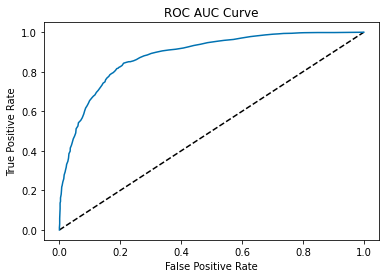

ROC AUC Score: 0.8835

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.82941531 0.82147165 0.82267793 0.80699638 0.82689988]

CV ROC AUC:
[0.89030368 0.87278931 0.88496219 0.8742184  0.88844857]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [15]:
# CodeBlock SubSection 5.1
# defining random forest model
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)
modeltraintest(vartrain, vartest, y_train, y_test, model)

In [16]:
# CodeBlock SubSection 5.1
# defining shorttraintest variable


def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model

    model_pred = model.predict(vartest)

    model_prob = model.predict_proba(vartest)

    print('Confusion Matrix:')

    print(confusion_matrix(y_test, model_pred))

    print("")

    #Assess with the model

    score = model.score(vartest, y_test)

    score_format = 'Accuracy Score: {0:.4f}'.format(score)

    print(score_format)

    recall = recall_score(y_test, model_pred)

    recall_format = 'Recall Score: {0:.4f}'.format(recall)

    print(recall_format)

    precision = precision_score(y_test, model_pred)

    precision_format = 'Precision Score: {0:.4f}'.format(precision)

    print(precision_format)
# calculate roc curve

y_pred_prob = model.predict_proba(vartest)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')


ROC AUC Score: 0.8835



# 5.2 Fine-tune the model to find the OPTIMAL model
o Using the techniques in Scenario 9, fine-tune the model to identify the
parameters for the OPTIMAL model (highest accuracy).

iteration 6 done. Accuracy = 0.8103545301069218
iteration 8 done. Accuracy = 0.8142937535171637
iteration 10 done. Accuracy = 0.8137310073157006
iteration 12 done. Accuracy = 0.8134496342149691
iteration 14 done. Accuracy = 0.8114800225098481
iteration 16 done. Accuracy = 0.8171074845244795
iteration 17 done. Accuracy = 0.8204839617332583
iteration 18 done. Accuracy = 0.8171074845244795
iteration 19 done. Accuracy = 0.814856499718627
iteration 20 done. Accuracy = 0.8142937535171637
iteration 21 done. Accuracy = 0.8162633652222847
iteration 22 done. Accuracy = 0.8159819921215532
iteration 23 done. Accuracy = 0.8179516038266742
iteration 30 done. Accuracy = 0.8131682611142375


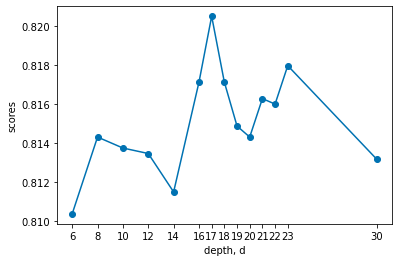

In [17]:
#CodeBlock Subsection 5.2
#depth = range(6,25)
#Chose to use a list instead of a rnage
depth = [6, 8, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 30]
#Creates an empty list
scores = []
for d in depth:

    classifier=RandomForestClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))
    
plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [18]:
#CodeBlock Subsection 5.2
# running radom forest model with max depth of 19 because it provided the maximum accuracy score. data may change when script is ran again.
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1957  282]
 [ 376  939]]

Accuracy Score: 0.8149
Recall Score: 0.7141
Precision Score: 0.7690


iteration 1 done. Accuracy = 0.7664603263927968
iteration 2 done. Accuracy = 0.7875633089476646
iteration 3 done. Accuracy = 0.7940348902644907
iteration 4 done. Accuracy = 0.8038829487900957
iteration 5 done. Accuracy = 0.803038829487901
iteration 6 done. Accuracy = 0.806978052898143
iteration 7 done. Accuracy = 0.8086662915025323
iteration 8 done. Accuracy = 0.8100731570061902
iteration 9 done. Accuracy = 0.8114800225098481
iteration 10 done. Accuracy = 0.8126055149127743
iteration 11 done. Accuracy = 0.814856499718627
iteration 12 done. Accuracy = 0.8193584693303321
iteration 13 done. Accuracy = 0.8165447383230163
iteration 14 done. Accuracy = 0.8162633652222847
iteration 15 done. Accuracy = 0.8142937535171637
iteration 16 done. Accuracy = 0.8168261114237478
iteration 17 done. Accuracy = 0.8151378728193585
iteration 18 done. Accuracy = 0.8157006190208216
iteration 19 done. Accuracy = 0.8120427687113112
iteration 20 done. Accuracy = 0.8151378728193585
iteration 21 done. Accuracy = 0.

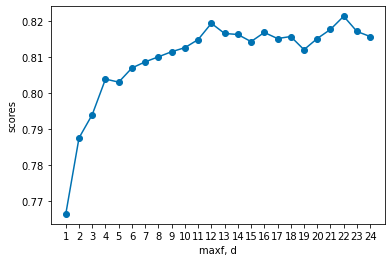

In [19]:
#CodeBlock Subsection 5.2
# running model to find max features
figsize=(20, 5)
maxf = range(1,25)
scores = []
for d in maxf:
    classifier=RandomForestClassifier(max_depth = 19, max_features = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))
    
plt.plot(maxf, scores, '-o')
plt.xlabel('maxf, d')
plt.ylabel('scores')
plt.xticks(maxf)
plt.show()

In [20]:
#CodeBlock Subsection 5.2
# running with set max features = 13 because it provided the highest accuracy score. data may change when script is ran again. 
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=17, max_features = 13, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1943  296]
 [ 356  959]]

Accuracy Score: 0.8165
Recall Score: 0.7293
Precision Score: 0.7641


iteration 1 done. Accuracy = 0.7518289251547552
iteration 20 done. Accuracy = 0.8120427687113112
iteration 50 done. Accuracy = 0.8157006190208216
iteration 100 done. Accuracy = 0.8165447383230163
iteration 150 done. Accuracy = 0.8176702307259426
iteration 500 done. Accuracy = 0.8168261114237478


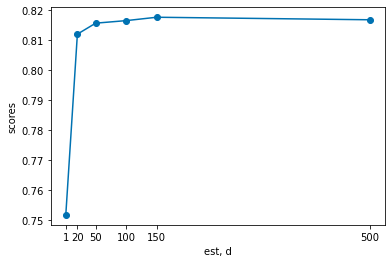

In [21]:
#CodeBlock Subsection 5.2
# running model to find n_estimators
figsize=(20, 5)
est = [1, 20, 50, 100, 150, 500]
scores = []

for d in est:
        classifier=RandomForestClassifier(max_depth = 19, max_features = 13, n_estimators = d, random_state=21)
        classifier=classifier.fit(X_train,y_train)
        score = classifier.score(X_test, y_test)
        scores.append(classifier.score(X_test, y_test))
        print("iteration {} done. Accuracy = ".format(d) + str(score))
                                          
plt.plot(est, scores, '-o')
plt.xlabel('est, d')
plt.ylabel('scores')
plt.xticks(est)
plt.show()


In [22]:
#CodeBlock Subsection 5.2
# running model with set parameters with n_estimators = 100 because it provided the highest accuracy score. data may change when whole script is ran.
vartrain = X_train_sc
vartest = X_test_sc
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1934  305]
 [ 354  961]]

Accuracy Score: 0.8146
Recall Score: 0.7308
Precision Score: 0.7591


In [23]:
#CodeBlock Subsection 5.2
# I decided to use these parameter settings because it gave the maximum accuracy score. data may change when rerunning the whole script
# Optimal Model
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1943  296]
 [ 356  959]]

Accuracy Score: 0.8165
Recall Score: 0.7293
Precision Score: 0.7641


# 5.3 Fine-tune the model to find the DECISION model
o Using the techniques in Scenario 9, change the class weights for the model to
identify the parameters for the DECISION model (based on precision and recall)

In [24]:
# CodeBlock SubSection 5.3
# checking class weight 
cw = [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5
}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w)
    varcw = w
    model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight=varcw,  random_state=21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)
    print('----------------------')
    

----------------------
Model with Class Weight: None

Confusion Matrix:
[[1943  296]
 [ 356  959]]

Accuracy Score: 0.8165
Recall Score: 0.7293
Precision Score: 0.7641
----------------------
----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[1949  290]
 [ 362  953]]

Accuracy Score: 0.8165
Recall Score: 0.7247
Precision Score: 0.7667
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[1950  289]
 [ 348  967]]

Accuracy Score: 0.8208
Recall Score: 0.7354
Precision Score: 0.7699
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[1953  286]
 [ 341  974]]

Accuracy Score: 0.8236
Recall Score: 0.7407
Precision Score: 0.7730
----------------------
----------------------
Model with Class Weight: {0: 1, 1: 2.5}

Confusion Matrix:
[[1937  302]
 [ 336  979]]

Accuracy Score: 0.8205
Recall Score: 0.7445
Precision Score: 0.7642
----------------------
-------------

In [25]:
# CodeBlock SubSection 5.3
# running with class_weight={0: 1, 1: 10} because it provided highest recall and precision score. data may change when running the whole script.
vartrain = X_train_sc
vartest = X_test_sc
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight={0: 1, 1: 10}, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1869  370]
 [ 270 1045]]

Accuracy Score: 0.8199
Recall Score: 0.7947
Precision Score: 0.7385


In [26]:
# CodeBlock SubSection 5.3
# Decision Model
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight={0: 1, 1: 10}, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[1868  371]
 [ 271 1044]]

Accuracy Score: 0.8194
Recall Score: 0.7939
Precision Score: 0.7378


In [27]:
# CodeBlock SubSection 5.3
# importing necassary libararies
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
# CodeBlock SubSection 5.3
# grid search
vartrain = X_train
vartest = X_test
grid={"criterion": ['gini', 'entropy'], "max_depth" : [10, 13, 15, 17, 19, 21, 23],
"n_estimators" : [20], "max_features" : [10, 11, 13, 14, 17],
"class_weight": [None]}
model_random = RandomForestClassifier(random_state=21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)
print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :", model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'n_estimators': 20, 'max_features': 11, 'max_depth': 13, 'criterion': 'gini', 'class_weight': None}
accuracy : 0.8214926660224486


In [ ]:
# CodeBlock SubSection 5.3
# Decision Model
# I decided to use the settings reccomended by the grid search because it gave the maximum recall and precision score. data may change when rerunning the whole script
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth=19, max_features = 13, n_estimators = 100, class_weight={0: 1, 1: 10}, random_state=21)
shorttraintest(vartrain, vartest, y_train, y_test, model)

# 5.4 Comments throughout Section 5 – and Summary Table
• Throughout section 5, explain why you chose specific parameters and how you decided
on the OPTIMAL and the DECISION model. You can be short and to the point.

# 6.1 Create a Summary Table
• Using the code on the next two pages, create a summary table of your 6 models:
o Logistic – OPTIMAL – your model parameters from HW04
o Logistic – DECISION – your model parameters from HW04
o Decision Tree – OPTIMAL – your model parameters from HW04
o Decision Tree – DECISION – your model parameters from HW04
o Random Forest – OPTIMAL – new from HW05 – Section 5
o Random Forest – DECISION – new from HW05 – Section 5

In [29]:
# CodeBlock Subsection 6.1
# importing needed libraries
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing se
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matri
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [30]:
# CodeBlock Subsection 6.1
#Set the parameters for the 6 models
model = [
#Logistic Regression - 3 models
(X_train_sc, X_test_sc, y_train,'log_opt','Logistic',
LogisticRegression(C=1000, penalty = 'l1', solver= 'saga', random_state=21)),
(X_train_sc, X_test_sc, y_train,'log_dec', 'Logistic',
LogisticRegression(C=10, class_weight = {0: 1, 1:2.5}, penalty = 'l1', solver = 'saga', random_state=21)),
#Decision Tree - 3 models
(X_train, X_test, y_train,'dt_opt', 'DecisionTree',
DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 36,class_weight={0: 1, 1: 5.5}, criterion = 'entropy', random_state = 21)),
(X_train, X_test, y_train,'dt_dec', 'DecisionTree',
DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 36,class_weight={0: 1, 1: 10}, criterion = 'entropy', random_state = 21)),
#Random Forest - 3 models
(X_train, X_test, y_train,'rf_opt', 'RandomForest',
RandomForestClassifier(max_depth = 19, max_features = 13,n_estimators = 100, class_weight={0: 1, 1: 5.5}, criterion = 'entropy', random_state=21)),
(X_train, X_test, y_train,'rf_dec', 'RandomForest',
RandomForestClassifier(max_depth = 19, max_features = 13,n_estimators = 100, class_weight={0: 1, 1: 10}, criterion = 'entropy', random_state=21)),
]
cm_all = pd.DataFrame(columns=['Model', 'Type','pred_noburg', 'pred_burg',
'Score', 'Recall', 'Precision', 'F1'])
for tr, tst, yt, n, mod, m in model:

    m.fit(tr, yt)
    model_pred = m.predict(tst)
    model_prob = m.predict_proba(tst)
    score = m.score(tst, y_test)
    score_format = '{0:.4f}'.format(score)

    recall = recall_score(y_test, model_pred)
    recall_format = '{0:.4f}'.format(recall)

    f1 = f1_score(y_test, model_pred)    
    f1_format = '{0:.4f}'.format(f1)
    
    precision = precision_score(y_test, model_pred)    
    precision_format = '{0:.4f}'.format(precision)
    
    y_pred_prob = m.predict_proba(tst)[:,1]    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    exec(f'fpr_{n} = fpr')
    exec(f'tpr_{n} = tpr')
    exec(f'thresholds_{n} = thresholds')
    exec(f'{n} = n')
    
    cm = pd.DataFrame(confusion_matrix(y_test, model_pred))
    cm=cm.rename(columns = {0:'pred_noburg', 1:'pred_burg'})
    exec(f'cm_{n} = cm')
    cm['Model'] = mod
    cm['Type'] = n
    cm['Score'] = score_format
    cm['Recall'] = recall_format
    cm['Precision'] = precision_format
    cm['F1'] = f1_format
    cm_all = pd.concat([cm_all, cm], axis=0)
print(n + " - Score: " + str(score_format) + " - Recall: " +
str(recall_format) + " - Precision: " + str(precision_format) + " - F1: " +
str(f1_format))
print('----------------------------------------------------------------')
cm_all = cm_all.reset_index()
cm_all['index'] = np.where(cm_all['index']==0, 'no_burglary', 'burglary')
cm_all = cm_all.rename(columns={'index':'actual'})
display(cm_all)
print('--------------------------------------------------------------------')

rf_dec - Score: 0.8236 - Recall: 0.7840 - Precision: 0.7504 - F1: 0.7668
----------------------------------------------------------------


,actual,Model,Type,pred_noburg,pred_burg,Score,Recall,Precision,F1
0,no_burglary,Logistic,log_opt,2049,190,0.7935,0.5863,0.8023,0.6775
1,burglary,Logistic,log_opt,544,771,0.7935,0.5863,0.8023,0.6775
2,no_burglary,Logistic,log_dec,1806,433,0.8084,0.8114,0.7113,0.7581
3,burglary,Logistic,log_dec,248,1067,0.8084,0.8114,0.7113,0.7581
4,no_burglary,DecisionTree,dt_opt,1690,549,0.7983,0.8722,0.6763,0.7619
5,burglary,DecisionTree,dt_opt,168,1147,0.7983,0.8722,0.6763,0.7619
6,no_burglary,DecisionTree,dt_dec,886,1353,0.6078,0.9688,0.4850,0.6464
7,burglary,DecisionTree,dt_dec,41,1274,0.6078,0.9688,0.4850,0.6464
8,no_burglary,RandomForest,rf_opt,1911,328,0.8239,0.7734,0.7561,0.7647
9,burglary,RandomForest,rf_opt,298,1017,0.8239,0.7734,0.7561,0.7647


--------------------------------------------------------------------


# 6.2 Understanding the additional officer hours for making a wrong
decision (no code for this section)
• When you make a wrong decision, it costs the police department officer hours.
According to the Police Chief, for every burglary that occurs in a subzone, it costs 3
additional officer hours compared to 1 hour when there is not a burglary and you
thought there would be a burglary.
Table 2: Confusion Matrix for Logistic Regression OPTIMAL from Table 1
Predicted
No Burglary Burglary
Actual
No Burglary
True Negative
2111
Predicted No Burglaries and
there was No Burglaries
0 additional officer hour
False Positive
183
Predicted At Least One Burglary and
there were No Burglaries
1 additional officer hours
Burglary
False Negative
499
Predicted No Burglaries and
there was At Least One Burglary
3 additional officer hour
True Positive
768
Predicted At Least One Burglary and
there was At Least One Burglary
0 additional officer hour
• Therefore, when you make a right decision, it does not cost the police department
additional officer hours. However, a False Negative will cost 1 additional hour for
each wrong prediction and a False Positive will cost 3 additional officer hours for
each wrong prediction.
• Example for Logistic Regression OPTIMAL:
o False Negative: 499 X 3 = 1497 additional officer hours
o False Positive: 183 X 1 = 183 additional officer hours
o Total additional officer hours = 1497 + 183 = 1,680
o Therefore, the Logistic OPTIMAL model will add an additional 1,680 officer hours.

# 6.3 Creating the additional officer hours for making a wrong prediction
• Based on Section 6.2, you are to calculate the additional hours when a wrong
prediction is made (False Positives and False Negatives). This is done by creating two
new columns named noburglary_hrs and burglary_hrs. (See Table 3)
o noburglary_hrs is calculated when:
§ actual == noburlgary then noburlgary hrs = pred_burg X 1
§ actual == burglary then noburglary_hrs = 0.
o burglary_hrs is calculated when:
§ actual == noburlgary then burlgary hrs = 0
§ actual == burglary then burglary_hrs = pred_noburg X 3.

In [31]:
# CodeBlock Subsection 6.3
# checking data
cm_all

,actual,Model,Type,pred_noburg,pred_burg,Score,Recall,Precision,F1
0,no_burglary,Logistic,log_opt,2049,190,0.7935,0.5863,0.8023,0.6775
1,burglary,Logistic,log_opt,544,771,0.7935,0.5863,0.8023,0.6775
2,no_burglary,Logistic,log_dec,1806,433,0.8084,0.8114,0.7113,0.7581
3,burglary,Logistic,log_dec,248,1067,0.8084,0.8114,0.7113,0.7581
4,no_burglary,DecisionTree,dt_opt,1690,549,0.7983,0.8722,0.6763,0.7619
5,burglary,DecisionTree,dt_opt,168,1147,0.7983,0.8722,0.6763,0.7619
6,no_burglary,DecisionTree,dt_dec,886,1353,0.6078,0.9688,0.4850,0.6464
7,burglary,DecisionTree,dt_dec,41,1274,0.6078,0.9688,0.4850,0.6464
8,no_burglary,RandomForest,rf_opt,1911,328,0.8239,0.7734,0.7561,0.7647
9,burglary,RandomForest,rf_opt,298,1017,0.8239,0.7734,0.7561,0.7647


In [32]:
# CodeBlock Subsection 6.3
# creating no burglary and burglary hrs
cm_all['noburglary_hrs'] = np.where(cm_all['actual']=='burlgary', 0, cm_all['pred_burg']*1)
cm_all['burglary_hrs'] = np.where(cm_all['actual']=='burglary', cm_all['pred_burg']*3, 0)
cm_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   actual          12 non-null     object
 1   Model           12 non-null     object
 2   Type            12 non-null     object
 3   pred_noburg     12 non-null     object
 4   pred_burg       12 non-null     object
 5   Score           12 non-null     object
 6   Recall          12 non-null     object
 7   Precision       12 non-null     object
 8   F1              12 non-null     object
 9   noburglary_hrs  12 non-null     object
 10  burglary_hrs    12 non-null     object
dtypes: object(11)
memory usage: 1.2+ KB


In [33]:
# CodeBlock Subsection 6.3
# checking data
cm_all

,actual,Model,Type,pred_noburg,pred_burg,Score,Recall,Precision,F1,noburglary_hrs,burglary_hrs
0,no_burglary,Logistic,log_opt,2049,190,0.7935,0.5863,0.8023,0.6775,190,0
1,burglary,Logistic,log_opt,544,771,0.7935,0.5863,0.8023,0.6775,771,2313
2,no_burglary,Logistic,log_dec,1806,433,0.8084,0.8114,0.7113,0.7581,433,0
3,burglary,Logistic,log_dec,248,1067,0.8084,0.8114,0.7113,0.7581,1067,3201
4,no_burglary,DecisionTree,dt_opt,1690,549,0.7983,0.8722,0.6763,0.7619,549,0
5,burglary,DecisionTree,dt_opt,168,1147,0.7983,0.8722,0.6763,0.7619,1147,3441
6,no_burglary,DecisionTree,dt_dec,886,1353,0.6078,0.9688,0.4850,0.6464,1353,0
7,burglary,DecisionTree,dt_dec,41,1274,0.6078,0.9688,0.4850,0.6464,1274,3822
8,no_burglary,RandomForest,rf_opt,1911,328,0.8239,0.7734,0.7561,0.7647,328,0
9,burglary,RandomForest,rf_opt,298,1017,0.8239,0.7734,0.7561,0.7647,1017,3051


In [34]:
# CodeBlock Subsection 6.3
# converting columns to float and int
cm_all['pred_noburg'] = cm_all['pred_noburg'].astype(float)
cm_all['pred_burg'] = cm_all['pred_burg'].astype(float)
cm_all['Score'] = cm_all['Score'].astype(float)
cm_all['Recall'] = cm_all['Recall'].astype(float)
cm_all['Precision'] = cm_all['Precision'].astype(float)
cm_all['F1'] = cm_all['F1'].astype(float)
cm_all['noburglary_hrs'] = cm_all['noburglary_hrs'].astype(int)
cm_all['burglary_hrs'] = cm_all['burglary_hrs'].astype(int)
cm_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual          12 non-null     object 
 1   Model           12 non-null     object 
 2   Type            12 non-null     object 
 3   pred_noburg     12 non-null     float64
 4   pred_burg       12 non-null     float64
 5   Score           12 non-null     float64
 6   Recall          12 non-null     float64
 7   Precision       12 non-null     float64
 8   F1              12 non-null     float64
 9   noburglary_hrs  12 non-null     int32  
 10  burglary_hrs    12 non-null     int32  
dtypes: float64(6), int32(2), object(3)
memory usage: 1.1+ KB


# 6.4 Group the additional officer hours for making a wrong prediction
• Based on the results from cm_all, you should have 12 rows, 2 rows per model. (See
Table 4 for non-null count)
• We want to aggregate this into one new DataFrame so that each is only one row for a
total of 6 rows.
• Therefore, aggregate the data through a groupby based on Type. You will want to:
o Calculate the sum noburglary_hrs and burglary_hrs (reset the index)
o Calculate the mean for Score, Recall, Precision, F1 (reset the index)
o Include the Model column by calculating the first record, such as:
§ cm_all_model = cm_all.groupby('Type')['Model'].first().reset_index()
o Merge the three different calculated groupings together and name it
model_cost.
• For model_cost, create a new column named pred_hrs that adds noburglary_hrs and
burglary_hrs together. (See Table 5 for an example of Logistic OPTIMAL)

In [55]:
# CodeBlock Subsection 6.4
# creating cm_all_burglary_sum 
cm_all_burglary_sum = cm_all.groupby('Type')[['noburglary_hrs','burglary_hrs']].sum().reset_index()
cm_all_burglary_sum

,Type,noburglary_hrs,burglary_hrs
0,dt_dec,2627,3822
1,dt_opt,1696,3441
2,log_dec,1500,3201
3,log_opt,961,2313
4,rf_dec,1374,3093
5,rf_opt,1345,3051


In [56]:
# CodeBlock Subsection 6.4
# creating cm_all_score_mean 

cm_all_score_mean = cm_all.groupby('Type')[['Score','Recall', 'Precision', 'F1']].mean().reset_index()
cm_all_score_mean

,Type,Score,Recall,Precision,F1
0,dt_dec,0.6078,0.9688,0.4850,0.6464
1,dt_opt,0.7983,0.8722,0.6763,0.7619
2,log_dec,0.8084,0.8114,0.7113,0.7581
3,log_opt,0.7935,0.5863,0.8023,0.6775
4,rf_dec,0.8236,0.7840,0.7504,0.7668
5,rf_opt,0.8239,0.7734,0.7561,0.7647


In [57]:
# CodeBlock Subsection 6.4
# creating cm_all_model

cm_all_model = cm_all.groupby('Type')['Model'].first().reset_index()
cm_all_model

,Type,Model
0,dt_dec,DecisionTree
1,dt_opt,DecisionTree
2,log_dec,Logistic
3,log_opt,Logistic
4,rf_dec,RandomForest
5,rf_opt,RandomForest


In [62]:
# CodeBlock Subsection 6.4
# merging cm_all_model and cm_all_score_mean

cm_merge = pd.merge(cm_all_model, cm_all_score_mean, how='outer', on='Type')
cm_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       6 non-null      object 
 1   Model      6 non-null      object 
 2   Score      6 non-null      float64
 3   Recall     6 non-null      float64
 4   Precision  6 non-null      float64
 5   F1         6 non-null      float64
dtypes: float64(4), object(2)
memory usage: 336.0+ bytes


In [63]:
# CodeBlock Subsection 6.4
# creating model_cost through merge with cm_merge and cm_all_burglary_sum

model_cost = pd.merge(cm_merge, cm_all_burglary_sum, how='outer', on='Type')
model_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            6 non-null      object 
 1   Model           6 non-null      object 
 2   Score           6 non-null      float64
 3   Recall          6 non-null      float64
 4   Precision       6 non-null      float64
 5   F1              6 non-null      float64
 6   noburglary_hrs  6 non-null      int32  
 7   burglary_hrs    6 non-null      int32  
dtypes: float64(4), int32(2), object(2)
memory usage: 384.0+ bytes


In [64]:
# CodeBlock Subsection 6.4
# creating pred_hrs

model_cost['pred_hrs'] = model_cost['noburglary_hrs'] + model_cost['burglary_hrs']
model_cost

,Type,Model,Score,Recall,Precision,F1,noburglary_hrs,burglary_hrs,pred_hrs
0,dt_dec,DecisionTree,0.6078,0.9688,0.4850,0.6464,2627,3822,6449
1,dt_opt,DecisionTree,0.7983,0.8722,0.6763,0.7619,1696,3441,5137
2,log_dec,Logistic,0.8084,0.8114,0.7113,0.7581,1500,3201,4701
3,log_opt,Logistic,0.7935,0.5863,0.8023,0.6775,961,2313,3274
4,rf_dec,RandomForest,0.8236,0.7840,0.7504,0.7668,1374,3093,4467
5,rf_opt,RandomForest,0.8239,0.7734,0.7561,0.7647,1345,3051,4396


# 7. Summarize and Visualize the Result
• Now that you have the additional officer hours, it is time to evaluate the best model
for making a decision. Therefore, use some of the following techniques to tell the
story of the best model and what it means. You do not need to include all or any of
the following suggestions, it is your choice on how you tell the story of the data.
o Sort the data
o Visualize the data
o Explain the data using markdown
• With markdown, make sure you explain why this is the best model and how it will
help the Canton Police Department.

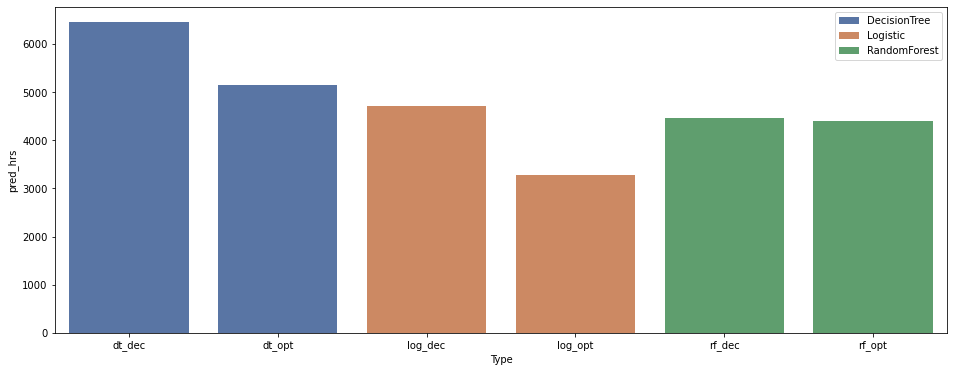

In [65]:
# CodeBlock Section 7
# barplot for predicted hours based on type
plt.figure(figsize=(16,6))
ax = sns.barplot(y = "pred_hrs", x = "Type", data = model_cost, hue= 'Model', palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

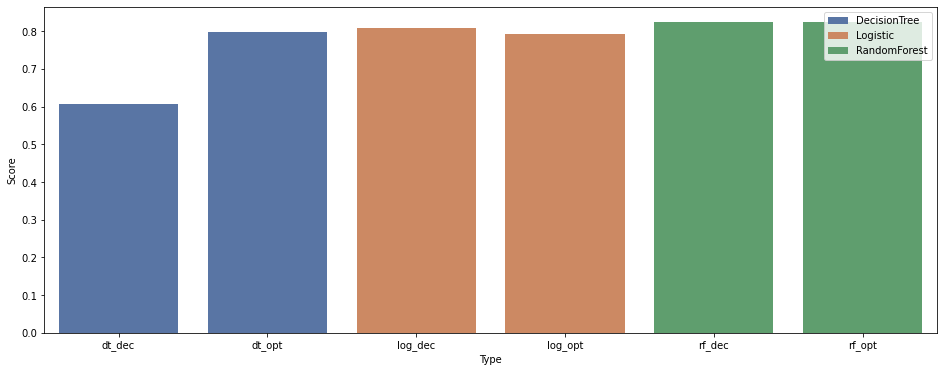

In [66]:
# CodeBlock Section 7
# barplot for accuracy score based on type
plt.figure(figsize=(16,6))
ax = sns.barplot(y = "Score", x = "Type", data = model_cost, hue= 'Model', palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

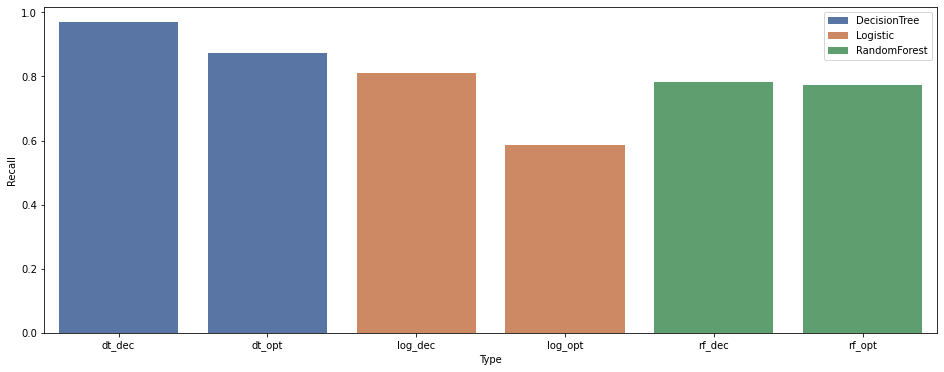

In [67]:
# CodeBlock Section 7
# barplot for recall score based on type
plt.figure(figsize=(16,6))
ax = sns.barplot(y = "Recall", x = "Type", data = model_cost, hue= 'Model', palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

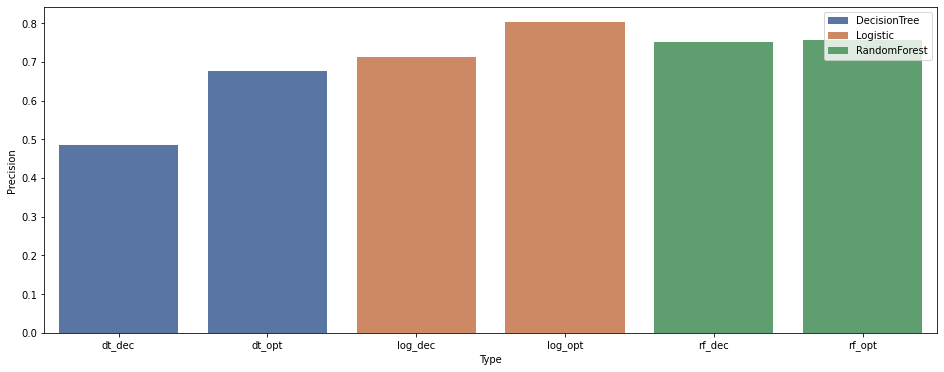

In [68]:
# CodeBlock Section 7
# barplot for Precision score based on type

plt.figure(figsize=(16,6))
ax = sns.barplot(y = "Precision", x = "Type", data = model_cost, hue= 'Model', palette = 'deep', dodge = False), 
plt.legend(loc="upper right")

# Section 7 Explain Results
o Explain the data using markdown
• With markdown, make sure you explain why this is the best model and how it will
help the Canton Police Department.


    The bar chart for prediction hours (pred_hrs) shows that the model with the highest predicted values is decision tree Decision model (dt_dec) with an approximate value of 6500; the next model with the second highest predicted values is decision tree optimal model (dt_opt) with an approximate value of 5200; followed by the next model with the third highest predicted values is logistic decision model (log_dec) with an approximate value of 4500; followed by random forest models optimal and decision with an approximate value of 4400; and the last model with the lowest prediction is logistic optimal model with an approximate value of 3200.
    
    The bar chart for accuracy score shows the random forest optimal and decision models have the highest accuracy score with an approximate value of 0.85; followed by the logistic decision model with an approximate value of 0.8; followed by the logistic optimal model and decision tree optimal model with an approximate value of 0.79; and the model with the least accuracy score is decision tree decision model (dt_dec) with an approximate value of 0.63.
    
    The bar chart for the recall score shows the decision tree decision (dt_dec) has the highest recall score with an approximate value of 0.9; followed by the decision tree optimal model (dt_opt) with an approximate value of 0.85; followed by the logistic decision model (log_dec) with an approximate value of 0.8; followed by the random forest optimal and decision models with an approximate value of 0.78; and the model with the least recall score is logistic optimal model with an approximate value of 0.59.
    
    The bar chart for the precision score shows the logistic optimal model has the highest precision score with an approximate value of 0.8; followed by the random forest models with an approximate value of 0.75; followed by the logistic decision model with an approximate value of 0.7; followed by the decision tree optimal model with an approximate value of 0.67; and the model with the least precision score is decision tree decision model with an approximate value of 0.5.

    Based on this information the writer selected the decision tree optimal model because it has balanced accuracy, recall and precision score with the second highest volume of predicted hours. The canton police department would benefit from the results of the analysis because of the overall balance of the prediction volume, accuracy, recall and precision score.  



# 8. Predict Week 50
• Import the dataset named CantonPoliceDept_HW05_Week49.csv.
• Using your best model, predict with the data from Week 49 to predict Week 50
burgstatus.
• Show a DataFrame that indicates which Subzone is expected to have a burglary.
• Using markdown explain the results and the action that the Police Chief should take
for officer allocation. Also, was this a good prediction?

In [39]:
# CodeBlock Section 8
# defining model with chosen model
model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 36,class_weight={0: 1, 1: 10}, criterion = 'entropy', random_state = 21)


In [42]:
# CodeBlock Section 8
# defning new test sets from df_canton_new

y_new_test = df_canton_new['BurgStatus']
vartest = df_canton_new.drop(['Subzone', 'YEAR_WEEK', 'SUB_YEAR_WEEK', 'call_ALL_target', 'call_Burglary_target', 'BurgStatus', 'BurgStatus2', 'All_comp',  'ActualBurg' ], axis = 1)
model.fit(vartest, y_new_test)
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)


In [43]:
# CodeBlock Section 8
# creating model pred and model prob

model_pred = pd.DataFrame(model_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Log'})
model_prob = pd.DataFrame(model_prob)
model_prob = model_prob.rename(columns = {0:'Prob_NoBurglary', 1:'Prob_Burglary'})
display(model_pred.sample(5, random_state=244))
model_prob.sample(5, random_state=244)

,Predict_Log
9,0
4,0
15,0
0,0
1,1


,Prob_NoBurglary,Prob_Burglary
9,1.0,0.0
4,1.0,0.0
15,1.0,0.0
0,1.0,0.0
1,0.0,1.0


In [46]:
# CodeBlock Section 8
# creating new data frame with subzone and y test, model pred and prob
df_new_cust = df_canton_new['Subzone']
df_new_cust = pd.concat([df_new_cust, y_new_test, model_pred, model_prob], axis = 1)
df_new_cust

,Subzone,BurgStatus,Predict_Log,Prob_NoBurglary,Prob_Burglary
0,ZONE1A,0,0,1.0,0.0
1,ZONE1B,1,1,0.0,1.0
2,ZONE1C,0,0,1.0,0.0
3,ZONE1D,0,0,1.0,0.0
4,ZONE2A,0,0,1.0,0.0
5,ZONE2B,0,0,1.0,0.0
6,ZONE2D,0,0,1.0,0.0
7,ZONE3B,0,0,1.0,0.0
8,ZONE3C,0,0,1.0,0.0
9,ZONE3D,0,0,1.0,0.0


In [49]:
# CodeBlock Section 8
# creating new dataframe with probability of burglary =1 and sorted by predicted log

df_new_cust_burglary = df_new_cust[df_new_cust['Prob_Burglary']==1].sort_values(by='Predict_Log')
df_new_cust_burglary

,Subzone,BurgStatus,Predict_Log,Prob_NoBurglary,Prob_Burglary
1,ZONE1B,1,1,0.0,1.0
10,ZONE3E,1,1,0.0,1.0
13,ZONE5A,1,1,0.0,1.0
14,ZONE5B,1,1,0.0,1.0


# Section 8 Explain Results
Show a DataFrame that indicates which Subzone is expected to have a burglary.
Using markdown explain the results and the action that the Police Chief should take
for officer allocation. Also, was this a good prediction?

    The data frame (df_new_cust_burglary) shows ZONE1B, ZONE3E, ZONE5A and ZONE5B have a burglary status of 1 with a predicted log of 1 as well and finally with a predictive probability of 1.0, which means there is various 100% certainty that there will be burglaries in these subzones. The canton police department would benefit from this information the allocate personnel and resources to these subzones in order to prevent burglary crimes. 
    
    In conclusion, the writer believes that this was a good prediction because the selected model allowed the reduction of subzones to 4 with the highest probability of burglary for subzones. 

